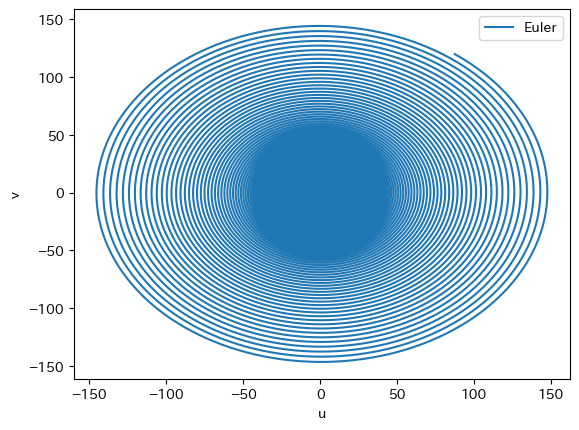

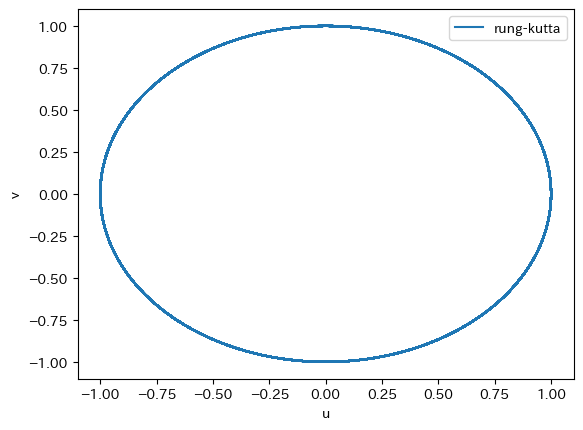

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

a=0
b=1000
n=100000
u_a=1
v_a=0

def f_1(u,v):
    return -v

def f_2(u,v):
    return u

def solve_oed_euler(a,b,f_1,f_2,n,u_a,v_a):
    dt = (b - a) / n
    t = [a + i * dt for i in range(n + 1)]
    u = np.zeros(n + 1)
    v = np.zeros(n + 1)

    u[0] = u_a
    v[0] = v_a

    for i in range(n):
        u[i+1]=u[i]+dt*f_1(u[i],v[i])
        v[i+1]=v[i]+dt*f_2(u[i],v[i])

    return (u,v)


def solve_oed_runge_kutta(a, b, f_1, f_2, n, u_a, v_a):
    dt = (b - a) / n
    t = [a + i * dt for i in range(n + 1)]
    u = np.zeros(n + 1)
    v = np.zeros(n + 1)

    u[0] = u_a
    v[0] = v_a

    for i in range(n):
        k_1 = f_1(u[i], v[i])
        l_1 = f_2(u[i], v[i])

        k_2 = f_1(u[i] + (1 / 2) * dt * k_1, v[i] + (1 / 2) * dt * l_1)
        l_2 = f_2(u[i] + (1 / 2) * dt * k_1, v[i] + (1 / 2) * dt * l_1)

        k_3 = f_1(u[i] + (1 / 2) * dt * k_2, v[i] + (1 / 2) * dt * l_2)
        l_3 = f_2(u[i] + (1 / 2) * dt * k_2, v[i] + (1 / 2) * dt * l_2)

        k_4 = f_1(u[i] + dt * k_3, v[i] + dt * l_3)
        l_4 = f_2(u[i] + dt * k_3, v[i] + dt * l_3)
        u[i + 1] = u[i] + (1 / 6) * dt * (k_1 + 2 * (k_2 + k_3) + k_4)
        v[i + 1] = v[i] + (1 / 6) * dt * (l_1 + 2 * (l_2 + l_3) + l_4)

    return (u, v)
euler_u,euler_v=solve_oed_euler(a,b,f_1,f_2,n,u_a,v_a)
rung_kutta_u,rung_kutta_v=solve_oed_runge_kutta(a,b,f_1,f_2,n,u_a,v_a)
#t=np.linspace(a,b,len(euler_u))

pdf=PdfPages("1SC22317Y04b02.pdf")

plt.figure()
plt.xlabel("u")
plt.ylabel("v")
plt.plot(euler_u,euler_v,label="Euler")
plt.legend()
pdf.savefig()

plt.figure()
plt.xlabel("u")
plt.ylabel("v")
plt.plot(rung_kutta_u,rung_kutta_v,label="rung-kutta")
plt.legend()

pdf.savefig()
#plt.plot(rung_kutta_u,rung_kutta_v,label="rung-kutta")

pdf.close()

plt.show()

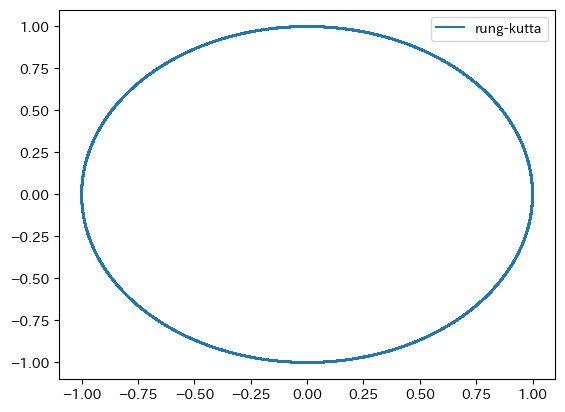

In [6]:
plt.plot(rung_kutta_u,rung_kutta_v,label="rung-kutta")
plt.legend()
plt.show()